# Week 2 - Policies
## Name: Rakshit Ramachandra Ayachit
## Registration No.: 210968045
## Batch: B1
## Section: DSE-A

In [2]:
! pip install gymnasium

     -------------------------------------- 953.9/953.9 kB 1.2 MB/s eta 0:00:00


In [2]:
pip install -U gym 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Reading all the datasets
df1 = pd.read_csv('movies.csv')
df2 = pd.read_csv('people.csv')
df3 = pd.read_csv('stars.csv')

# Renaming the columns
df1.rename(columns = {'id':'movie_id'}, inplace = True)
df2.rename(columns = {'id':'person_id'}, inplace = True)

# Merging the datasets
df = df3.merge(df1, on='movie_id', how='left').merge(df2, on='person_id', how='left')

#Dropping unnecessary columns
df = df.drop(['birth', 'person_id', 'movie_id'], axis = 1)

#Sorting the columns
df = df.sort_index(axis=1)

#Saving the dataset
df.to_csv('small.csv', index=False)

In [3]:
df

,name,title,year
0,Kevin Bacon,A Few Good Men,1992
1,Kevin Bacon,Apollo 13,1995
2,Tom Cruise,A Few Good Men,1992
3,Tom Cruise,Rain Man,1988
4,Cary Elwes,The Princess Bride,1987
5,Tom Hanks,Forrest Gump,1994
6,Tom Hanks,Apollo 13,1995
7,Mandy Patinkin,The Princess Bride,1987
8,Dustin Hoffman,Rain Man,1988
9,Chris Sarandon,The Princess Bride,1987


In [4]:
import csv
import time
from queue import Queue

# Function to load data from the CSV file
def load_data(filename):
    data = {}
    with open(filename, "r") as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            if row[0] not in data:
                data[row[0]] = set()
            data[row[0]].add(row[1])
            if row[1] not in data:
                data[row[1]] = set()
            data[row[1]].add(row[0])
    return data

# Function to find the shortest path between two actors using BFS
def bfs(start, end, data):
    visited = set()
    queue = Queue()
    queue.put((start, 0, [start]))  # Add path to the queue
    while not queue.empty():
        actor, degree, path = queue.get()
        if actor == end:
            return degree, path
        visited.add(actor)
        for neighbor in data[actor]:
            if neighbor not in visited:
                new_path = path + [neighbor]  # Extend the current path
                queue.put((neighbor, degree + 1, new_path))
    return None, None  # If no path found

if __name__ == "__main__":
    # Start measuring time
    start_time = time.time()

    # Load data and perform BFS
    data = load_data('small.csv')
    start = "Dustin Hoffman"
    end = "Chris Sarandon"
    degree, path = bfs(start, end, data)

    # End measuring time
    end_time = time.time()

    # Calculate the time taken
    time_taken = (end_time - start_time) * 1000  # Convert to milliseconds

    # Print the result and time taken
    if degree is None:
        print("No connection found")
    else:
        print(f"Shortest path from {start} to {end} (Degree of Separation = {degree}):")
        print(" -> ".join(path))
        print("Time taken:", time_taken, "milliseconds")


Shortest path from Dustin Hoffman to Chris Sarandon (Degree of Separation = 10):
Dustin Hoffman -> Rain Man -> Tom Cruise -> A Few Good Men -> Kevin Bacon -> Apollo 13 -> Tom Hanks -> Forrest Gump -> Robin Wright -> The Princess Bride -> Chris Sarandon
Time taken: 7.03120231628418 milliseconds


In [5]:
import csv
import time

# Load the data from the CSV file into a dictionary
def load_data(filename):
    data = {}
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            actor = row[0]
            movie = row[1]
            if actor not in data:
                data[actor] = set()
            data[actor].add(movie)
            if movie not in data:
                data[movie] = set()
            data[movie].add(actor)
    return data

# Find the shortest path between two actors using depth first search
def dfs(data, start, end, path=None):
    if path is None:
        path = [start]
    if start == end:
        return path
    for actor in data[start]:
        if actor not in path:
            new_path = dfs(data, actor, end, path + [actor])
            if new_path is not None:
                return new_path
    return None

if __name__ == "__main__":
    # Load the data from the CSV file
    data = load_data('small.csv')

    # Start measuring time in milliseconds
    start_time = time.time() * 1000

    # Find the shortest path between Dustin Hoffman and Chris Sarandon
    path = dfs(data, 'Dustin Hoffman', 'Chris Sarandon')

    # End measuring time in milliseconds
    end_time = time.time() * 1000

    # Calculate the time taken
    time_taken = end_time - start_time

    # Print the shortest path and time taken
    if path is None:
        print("No path found")
    else:
        print("Shortest Path:", " -> ".join(path))
        print("Time taken:", time_taken, "milliseconds")


Shortest Path: Dustin Hoffman -> Rain Man -> Tom Cruise -> A Few Good Men -> Kevin Bacon -> Apollo 13 -> Tom Hanks -> Forrest Gump -> Robin Wright -> The Princess Bride -> Chris Sarandon
Time taken: 0.0 milliseconds


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

In [2]:
env = gym.make('CartPole-v1', render_mode='human')

In [3]:
#theta policy
episodes = 10
scores1 = []
for episode in range(episodes):
    obs, info = env.reset()
    total_reward = 0
    num_steps = 0
    terminated = False
    while not terminated:
        theta = obs[2]
        if (theta < 0):
            #left
            action = 0
        else:
            #right
            action = 1
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        num_steps += 1
    scores1.append(total_reward)
    print("Episode: {}, Score: {}, Steps: {}".format(episode+1, total_reward, num_steps))
env.close()

Episode: 1, Score: 44.0, Steps: 44
Episode: 2, Score: 41.0, Steps: 41
Episode: 3, Score: 41.0, Steps: 41
Episode: 4, Score: 43.0, Steps: 43
Episode: 5, Score: 45.0, Steps: 45
Episode: 6, Score: 38.0, Steps: 38
Episode: 7, Score: 48.0, Steps: 48
Episode: 8, Score: 41.0, Steps: 41
Episode: 9, Score: 38.0, Steps: 38
Episode: 10, Score: 38.0, Steps: 38


In [4]:
#omega policy
env = gym.make('CartPole-v1', render_mode='human')
episodes = 10
scores2 = []
for episode in range(episodes):
    obs, info = env.reset()
    total_reward = 0
    num_steps = 0
    terminated = False
    while not terminated:
        omega = obs[3]
        if (omega < 0):
            #left
            action = 0
        else:
            #right
            action = 1
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        num_steps += 1
    scores2.append(total_reward)
    print("Episode: {}, Score: {}, Steps: {}".format(episode+1, total_reward, num_steps))
env.close()

Episode: 1, Score: 148.0, Steps: 148
Episode: 2, Score: 149.0, Steps: 149
Episode: 3, Score: 197.0, Steps: 197
Episode: 4, Score: 144.0, Steps: 144
Episode: 5, Score: 200.0, Steps: 200
Episode: 6, Score: 226.0, Steps: 226
Episode: 7, Score: 219.0, Steps: 219
Episode: 8, Score: 149.0, Steps: 149
Episode: 9, Score: 203.0, Steps: 203
Episode: 10, Score: 152.0, Steps: 152


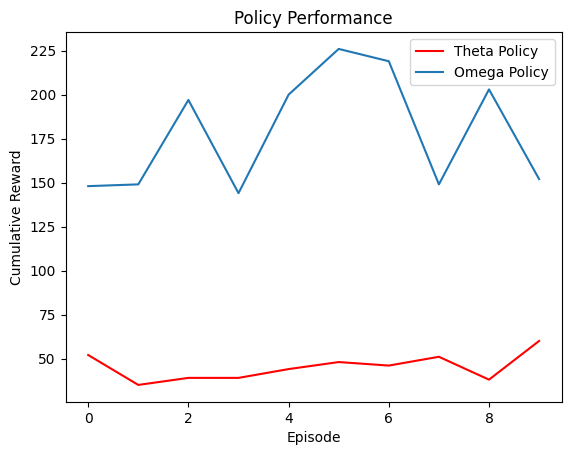

In [5]:
plt.plot(scores1, label='Theta Policy', color='red')
plt.plot(scores2, label='Omega Policy')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Policy Performance')
plt.show()

In [6]:
print("Theta Policy Rewards:")
print("Mean: ", np.mean(scores1), " Standard Deviation: ", np.std(scores1))

Theta Policy Rewards:
Mean:  45.2  Standard Deviation:  7.359347797189639


In [7]:
print("Omega Policy Rewards:")
print("Mean: ", np.mean(scores2), " Standard Deviation: ", np.std(scores2))

Omega Policy Rewards:
Mean:  178.7  Standard Deviation:  31.407164787672254


In [4]:
env=gym.make("CartPole-v0", render_mode="rgb_array")
print("Observation Space:", env.observation_space)

Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [5]:
#Theta Policy
import time 
#num_steps = 1500
ep_no=0
episode_sum = 0
new_obs = env.reset()[0]
while ep_no<100:
    #action = env.action_space.sample()   
    if new_obs[2]<0:
        action=0
    else:
        action=1
    new_obs, reward, terminated, truncated, info = env.step(action) 
    episode_sum+= reward
    time.sleep(0.001)
    if terminated or truncated:
        print(episode_sum)
        ep_no=ep_no+1
        episode_sum = 0
        env.reset()
env.close()

34.0
41.0
38.0
41.0
25.0
56.0
45.0
40.0
46.0
34.0
40.0
60.0
38.0
33.0
36.0
52.0
48.0
37.0
41.0
35.0
39.0
38.0
25.0
64.0
50.0
56.0
48.0
42.0
39.0
48.0
36.0
41.0
54.0
51.0
39.0
39.0
46.0
51.0
40.0
57.0
42.0
45.0
41.0
49.0
40.0
43.0
54.0
35.0
56.0
43.0
42.0
59.0
32.0
30.0
43.0
45.0
43.0
41.0
53.0
37.0
38.0
41.0
45.0
29.0
46.0
35.0
38.0
39.0
40.0
40.0
36.0
38.0
28.0
41.0
42.0
36.0
32.0
51.0
28.0
26.0
47.0
57.0
39.0
53.0
60.0
45.0
58.0
28.0
26.0
47.0
38.0
39.0
35.0
35.0
35.0
43.0
46.0
43.0
33.0
41.0


In [ ]:
#Omega Policy
import time 
#num_steps = 1500
ep_no=0
episode_sum = 0
new_obs = env.reset()[0]
while ep_no<100:
    #action = env.action_space.sample()   
    if new_obs[3]<0:
        action=0
    else:
        action=1
    new_obs, reward, terminated, truncated, info = env.step(action) 
    episode_sum+= reward
    time.sleep(0.001)
    if terminated or truncated:
        print(episode_sum)
        ep_no=ep_no+1
        episode_sum = 0
        env.reset()
env.close()

156.0
129.0
199.0
179.0
200.0
200.0
141.0
144.0
200.0
200.0
141.0
159.0
142.0
153.0
200.0
200.0
200.0
146.0
200.0
141.0
200.0
179.0
173.0
171.0
200.0
200.0
165.0
200.0
137.0
200.0
166.0
164.0
200.0
200.0
200.0
197.0
200.0
200.0
200.0
149.0
200.0
200.0
151.0
160.0
138.0
168.0
157.0


Episode: 1, Score: 136.0, Steps: 136
Episode: 2, Score: 127.0, Steps: 127
Episode: 3, Score: 203.0, Steps: 203
Episode: 4, Score: 150.0, Steps: 150
Episode: 5, Score: 195.0, Steps: 195
Episode: 6, Score: 166.0, Steps: 166
Episode: 7, Score: 198.0, Steps: 198
Episode: 8, Score: 212.0, Steps: 212
Episode: 9, Score: 143.0, Steps: 143
Episode: 10, Score: 148.0, Steps: 148


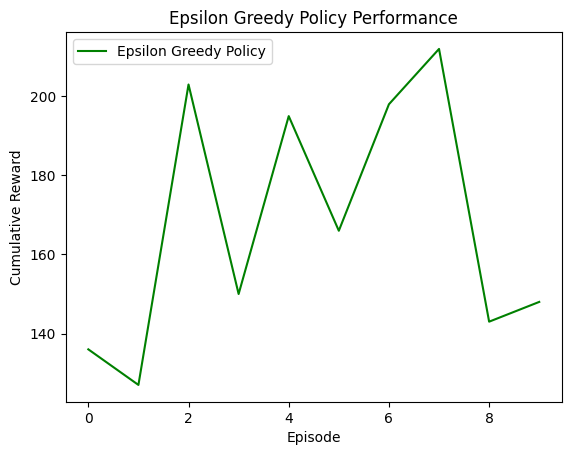

Epsilon-Greedy Policy Rewards:
Mean:  167.8  Standard Deviation:  29.744915531902258


In [6]:
# Epsilon-greedy Policy
epsilon = 0.1  # Epsilon value for exploration

env = gym.make('CartPole-v1', render_mode='human')
episodes = 10
scores_epsilon = []

for episode in range(episodes):
    obs, info = env.reset()
    total_reward = 0
    num_steps = 0
    terminated = False
    
    while not terminated:
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore: Choose random action
        else:
            # Exploit: Choose action based on the Omega value
            omega = obs[3]
            if omega < 0:
                action = 0  # Left
            else:
                action = 1  # Right
        
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        num_steps += 1
    
    scores_epsilon.append(total_reward)
    print("Episode: {}, Score: {}, Steps: {}".format(episode+1, total_reward, num_steps))

env.close()

# Plot the scores of the epsilon-greedy policy
plt.plot(scores_epsilon, label='Epsilon Greedy Policy', color='green')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Epsilon Greedy Policy Performance')
plt.legend()
plt.show()

print("Epsilon-Greedy Policy Rewards:")
print("Mean: ", np.mean(scores_epsilon), " Standard Deviation: ", np.std(scores_epsilon))


Episode: 1, Score: 39.0, Steps: 39
Episode: 2, Score: 37.0, Steps: 37
Episode: 3, Score: 40.0, Steps: 40
Episode: 4, Score: 35.0, Steps: 35
Episode: 5, Score: 34.0, Steps: 34
Episode: 6, Score: 46.0, Steps: 46
Episode: 7, Score: 53.0, Steps: 53
Episode: 8, Score: 52.0, Steps: 52
Episode: 9, Score: 51.0, Steps: 51
Episode: 10, Score: 57.0, Steps: 57
Episode: 1, Score: 257.0, Steps: 257
Episode: 2, Score: 270.0, Steps: 270
Episode: 3, Score: 157.0, Steps: 157
Episode: 4, Score: 157.0, Steps: 157
Episode: 5, Score: 271.0, Steps: 271
Episode: 6, Score: 172.0, Steps: 172
Episode: 7, Score: 136.0, Steps: 136
Episode: 8, Score: 267.0, Steps: 267
Episode: 9, Score: 143.0, Steps: 143
Episode: 10, Score: 192.0, Steps: 192
Episode: 1, Score: 56.0, Steps: 56
Episode: 2, Score: 42.0, Steps: 42
Episode: 3, Score: 49.0, Steps: 49
Episode: 4, Score: 53.0, Steps: 53
Episode: 5, Score: 34.0, Steps: 34
Episode: 6, Score: 37.0, Steps: 37
Episode: 7, Score: 61.0, Steps: 61
Episode: 8, Score: 37.0, Steps: 3

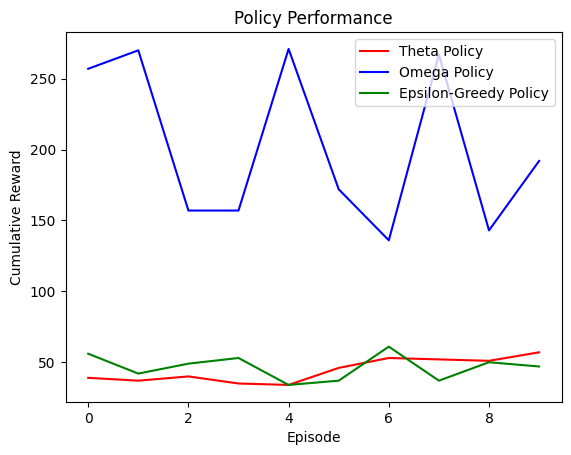

Theta Policy Rewards:
Mean:  44.4  Standard Deviation:  7.977468270071652
Omega Policy Rewards:
Mean:  202.2  Standard Deviation:  54.33378322922121
Epsilon-Greedy Policy Rewards:
Mean:  46.6  Standard Deviation:  8.475848040166836


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Function to run a policy
def run_policy(policy, env, episodes):
    scores = []
    for episode in range(episodes):
        obs = env.reset()
        total_reward = 0
        num_steps = 0
        terminated = False
        while not terminated:
            action = policy(obs)
            next_obs, reward, terminated, _ = env.step(action)
            total_reward += reward
            num_steps += 1
            obs = next_obs  # Update the current observation
#             env.render()   # Render the environment

        scores.append(total_reward)
        print("Episode: {}, Score: {}, Steps: {}".format(episode+1, total_reward, num_steps))
    env.close()
    return scores

# Theta Policy
def theta_policy(obs):
    theta = obs[2]
    if theta < 0:
        return 0  # Left
    else:
        return 1  # Right

# Omega Policy
def omega_policy(obs):
    omega = obs[3]
    if omega < 0:
        return 0  # Left
    else:
        return 1  # Right

# Epsilon Greedy Policy
def epsilon_greedy_policy(obs, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.randint(2)  # Random action
    else:
        return theta_policy(obs)  # Use theta policy for exploitation

# Create environment
env = gym.make('CartPole-v1')

# Run policies
episodes = 10
scores_theta = run_policy(theta_policy, env, episodes)
scores_omega = run_policy(omega_policy, env, episodes)
scores_epsilon_greedy = run_policy(epsilon_greedy_policy, env, episodes)

# Plot scores
plt.plot(scores_theta, label='Theta Policy', color='red')
plt.plot(scores_omega, label='Omega Policy', color='blue')
plt.plot(scores_epsilon_greedy, label='Epsilon-Greedy Policy', color='green')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Policy Performance')
plt.show()

# Display mean and standard deviation
print("Theta Policy Rewards:")
print("Mean: ", np.mean(scores_theta), " Standard Deviation: ", np.std(scores_theta))

print("Omega Policy Rewards:")
print("Mean: ", np.mean(scores_omega), " Standard Deviation: ", np.std(scores_omega))

print("Epsilon-Greedy Policy Rewards:")
print("Mean: ", np.mean(scores_epsilon_greedy), " Standard Deviation: ", np.std(scores_epsilon_greedy))


Episode: 1, Score: -123.0, Steps: 123
Episode: 2, Score: -114.0, Steps: 114
Episode: 3, Score: -121.0, Steps: 121
Episode: 4, Score: -115.0, Steps: 115
Episode: 5, Score: -115.0, Steps: 115
Episode: 6, Score: -114.0, Steps: 114
Episode: 7, Score: -114.0, Steps: 114
Episode: 8, Score: -125.0, Steps: 125
Episode: 9, Score: -115.0, Steps: 115
Episode: 10, Score: -122.0, Steps: 122
Episode: 1, Score: -114.0, Steps: 114
Episode: 2, Score: -122.0, Steps: 122
Episode: 3, Score: -115.0, Steps: 115
Episode: 4, Score: -122.0, Steps: 122
Episode: 5, Score: -122.0, Steps: 122
Episode: 6, Score: -114.0, Steps: 114
Episode: 7, Score: -117.0, Steps: 117
Episode: 8, Score: -122.0, Steps: 122
Episode: 9, Score: -114.0, Steps: 114
Episode: 10, Score: -121.0, Steps: 121
Episode: 1, Score: -127.0, Steps: 127
Episode: 2, Score: -117.0, Steps: 117
Episode: 3, Score: -120.0, Steps: 120
Episode: 4, Score: -121.0, Steps: 121
Episode: 5, Score: -126.0, Steps: 126
Episode: 6, Score: -120.0, Steps: 120
Episode: 7

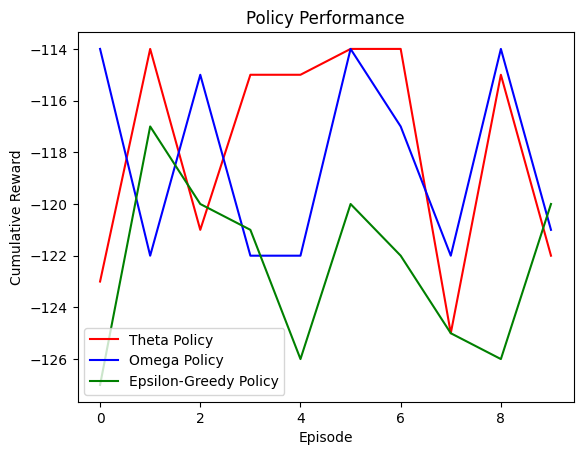

Theta Policy Rewards:
Mean:  -117.8  Standard Deviation:  4.166533331199932
Omega Policy Rewards:
Mean:  -118.3  Standard Deviation:  3.606937759374287
Epsilon-Greedy Policy Rewards:
Mean:  -122.4  Standard Deviation:  3.1999999999999997


In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Function to run a policy
def run_policy(policy, env, episodes):
    scores = []
    for episode in range(episodes):
        obs = env.reset()
        total_reward = 0
        num_steps = 0
        terminated = False
        while not terminated:
            action = policy(obs)
            next_obs, reward, terminated, _ = env.step(action)
            total_reward += reward
            num_steps += 1
            obs = next_obs  # Update the current observation
        scores.append(total_reward)
        print("Episode: {}, Score: {}, Steps: {}".format(episode+1, total_reward, num_steps))
    env.close()
    return scores

# Theta Policy for MountainCar
def theta_policy(obs):
    position, velocity = obs
    if velocity < 0:
        return 0  # Push left
    else:
        return 2  # Push right

# Omega Policy for MountainCar
def omega_policy(obs):
    position, velocity = obs
    if velocity < 0:
        return 0  # Push left
    else:
        return 2  # Push right

# Epsilon Greedy Policy for MountainCar
def epsilon_greedy_policy(obs, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.randint(3)  # Random action (0: left, 1: stay, 2: right)
    else:
        return theta_policy(obs)  # Use theta policy for exploitation

# Create MountainCar environment
env = gym.make('MountainCar-v0')

# Run policies
episodes = 10
scores_theta = run_policy(theta_policy, env, episodes)
scores_omega = run_policy(omega_policy, env, episodes)
scores_epsilon_greedy = run_policy(epsilon_greedy_policy, env, episodes)

# Plot scores
plt.plot(scores_theta, label='Theta Policy', color='red')
plt.plot(scores_omega, label='Omega Policy', color='blue')
plt.plot(scores_epsilon_greedy, label='Epsilon-Greedy Policy', color='green')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Policy Performance')
plt.show()

# Display mean and standard deviation
print("Theta Policy Rewards:")
print("Mean: ", np.mean(scores_theta), " Standard Deviation: ", np.std(scores_theta))

print("Omega Policy Rewards:")
print("Mean: ", np.mean(scores_omega), " Standard Deviation: ", np.std(scores_omega))

print("Epsilon-Greedy Policy Rewards:")
print("Mean: ", np.mean(scores_epsilon_greedy), " Standard Deviation: ", np.std(scores_epsilon_greedy))
